In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
X = np.array([
    [30, 13],
    [50, 15.5],
    [70, 17],
    [90, 19],
    [105,21],
    [110, 23],
    [120, 26],
    [130, 31]
])
x = X[:,0]
y_true = X[:,1]

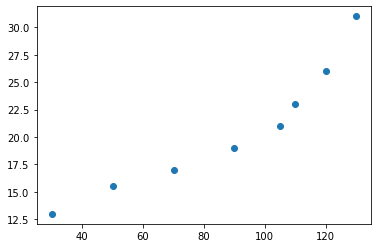

In [70]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y_true);

In [71]:
(a,b,c) = np.polyfit(x, y_true, 2)
y_pred = a*(x**2) + b*x + c

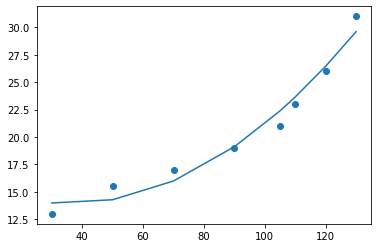

In [73]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y_true)
ax.plot(x, y_pred);

In [74]:
(a, b, c)

(0.001767198580424459, -0.12671223347795096, 16.208785642924134)

In [48]:
def consumption(v):
    """
    Returns the consumption (in kWh) per 100 km, depending on the speed v in km per hour
    """
    return 19.0

def battery_safety_level(s, v):
    """
    Returns the minimum battery level to keep for safety.
    In case one of the charging points is failing, it is the safety distance to the next charging station
    """
    return (consumption(v)*s)/100

def available_distance(e, s, v):
    e_safety = battery_safety_level(s, v)
    useful_e = (e - e_safety)
    if useful_e < 0:
        raise ValueError("The available battery is below the safety level")
        return None
    else:
        return (useful_e/consumption(v))*100

def charging_time(start, end, power):
    """
    Returns the time needed to charge the car, in hour
    Power: kWh per hour, or kW :)
    """
    return (end-start)/power

In [59]:
def total_time(d, v, e, s, power):
    first_dist_max = available_distance(e, s, v)
    if d < first_dist_max:
        # No need for charging
        return d/v
    else:
        d_rest = d-first_dist_max
        t_per_charge = first_dist_max/v + charging_time(battery_safety_level(s, v), 0.8*e, power)
        t_first = (first_dist_max/v) + t_per_charge
        d_charge = available_distance(0.8*e, s, v)
        n_charges_rest = d_rest//d_charge
        #TODO: the last charge should be calibrated to the remaining distance
        t_charges_rest = n_charges_rest * t_per_charge
        t_total = (d/v) + t_per_charge*(1+n_charges_rest)
        return t_total

In [60]:
v = 100
e = 64
s = 60
power = 50
d_array =np.linspace(250, 650, 20)
m = []
for d in d_array:
    m.append(total_time(d, v, e, s, power))

In [62]:
from matplotlib import pyplot as plt

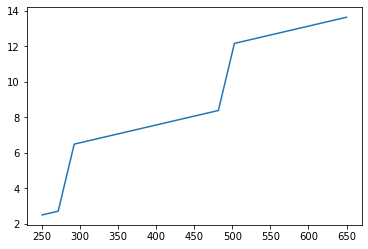